## 0. Tips data EDA (*)

In the whole exercise, we will work with the "tips" dataset from seaborn dataset. Start by loading dataset "tips" from the ```load_dataset``` method in seaborn module. The goal will be to use polynomial linear regression to predict tips. 

&nbsp; a) Start by doing some initial EDA such as info(), describe().

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. Plot the descriptive statistics for each numerical column, with a adequate plot type (e.g. barplot).

&nbsp; c) Based on the initial EDA, make some more plots on things you think could be worthwhile to investigate. 

&nbsp; d) Try discuss your findings with yourself/colleague and draw some conclusions if possible. Note that in reality, it is important to be able to communicate your findings so that other people in your team/customers/stakeholders etc. get an understanding of the data and realizes the importance of your role as a data scientist/analyst.

<details>

<summary>Answer</summary>


b)
<img src="../assets/df_describe.png" height="300"/>

c) Here are some example plots

<img src="../assets/tips_EDA.png" height="300"/>

<img src="../assets/tips_smoke_sex.png" width="500"/>

<img src="../assets/tips_pie_sex.png" width="300"/>


d) For example: 
- there are almost double amount of females represented in the dataset
- there are very few tables with 1 person eating, and they usually give very low tip
- female and male tip somewhat similar

</details>

---

In [36]:
import seaborn as sns


df = sns.load_dataset("tips")
df_female = df["sex"] == "Female"
df_male = df["sex"] == "Male"
df[df_female]["tip"].mean(), df[df_male]["tip"].mean()

(2.8334482758620685, 3.0896178343949043)

In [37]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [38]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: xlabel='sex', ylabel='tip'>

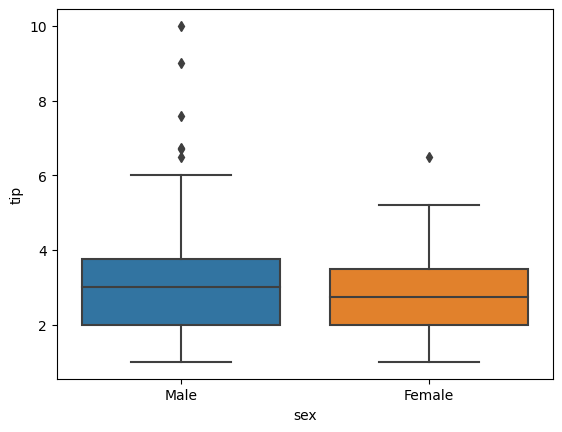

In [40]:
sns.boxplot(df, x="sex", y="tip")

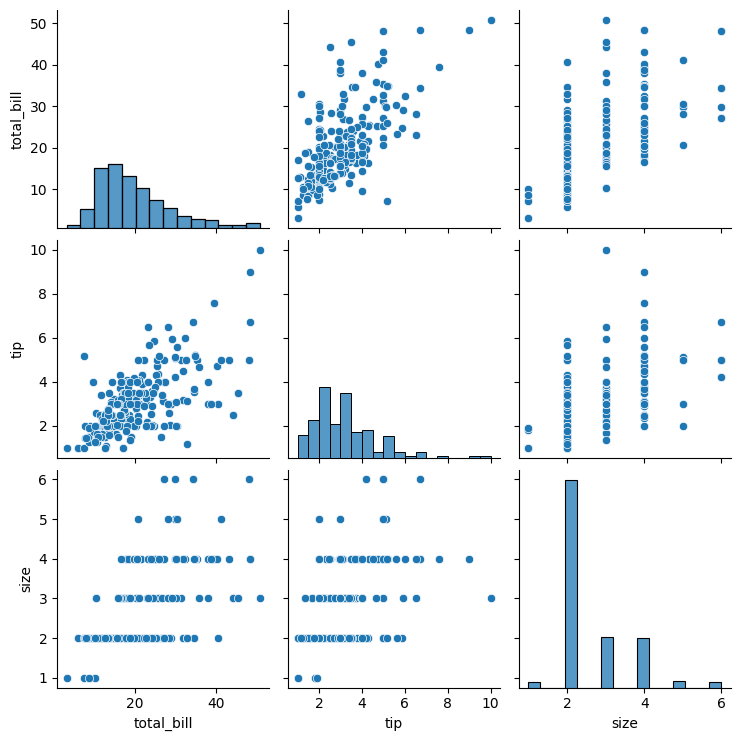

In [41]:
sns.pairplot(df) # note that diagonal are histplot()

<Axes: xlabel='size', ylabel='Count'>

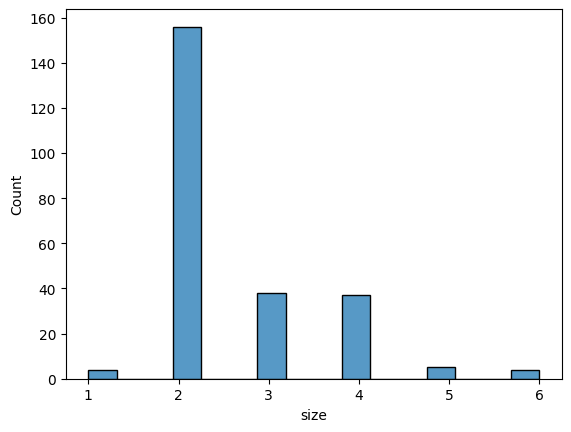

In [42]:
sns.histplot(df["size"])

(87, 157)

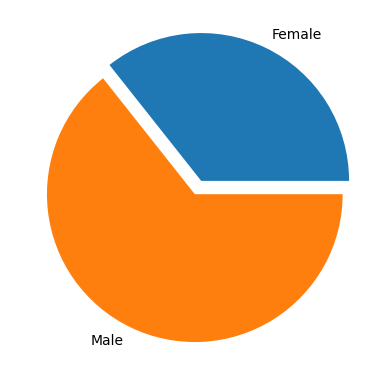

In [43]:
import matplotlib.pyplot as plt
female_count = len(df[df["sex"] == "Female"])
male_count = len(df[df["sex"] == "Male"])
plt.pie([female_count, male_count], labels = ["Female", "Male"], explode = [0.1, 0]);
female_count, male_count

## 1. Train|test split (*)

Split the data into training part and testing part, using sklearn's train_test_split with test size of 0.3 and random_state 42.

In [44]:
from sklearn.model_selection import train_test_split

X, y = df.drop("tip", axis=1), df["tip"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


---
## 2. Feature standardization (*)

We need to normalize the data and in this case will be using feature standardization. Implement this yourself following this formula:

$$X_{train}' = \frac{X_{train}-\mu_{train}}{\sigma_{train}}$$

$$X_{test}' = \frac{X_{test}-\mu_{train}}{\sigma_{train}}$$

, where $'$ denotes scaled, $\mu_{train}$ is the mean of the training data, $\sigma_{train}$ is the standard deviation of the training data. Note that it is very important that the mean and standard deviation is computed from the training data and not from testing data to avoid data leakage. Control the standard deviation and mean of $X_{train}'$ and $X_{test}'$. Is the results as you expect, why, why not?

<details>

<summary>Answer</summary>

scaled_X_train (total_bill, size) mean: [ 6.79195262e-17 -1.98534000e-16]

scaled_X_test (total_bill, size) mean: [-0.19137999 -0.04477934]

scaled_X_train (total_bill, size) std: [1. 1.]

scaled_X_test (total_bill, size) std: [0.92495673 1.06638889]

</details>

In [45]:
import pandas as pd

df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


In [46]:
from sklearn.preprocessing import StandardScaler

X, y = df.drop(["tip", "sex", "day", "smoker", "time"] , axis=1), df["tip"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.mean(), scaled_X_train.std(), scaled_X_test.mean(), scaled_X_test.std()


(-2.0898315757650005e-17, 1.0, -0.11842850105809709, 0.9970563805771954)

---
## 3. Polynomial features (*)

We want to investigate ```Polynomialfeatures``` from scikit-klearn in this task. Start by instantiating an object of type ```PolynomialFeatures``` with degree 2. Now do the following: 

- use the method fit on $X_{train}'$
- transform $X_{train}'$
- transform $X_{test}'$

Compare this transformed $X_{test}'$ with $X_{test}''$ where $X_{test}''$ comes from fitting the polynomial features to $X_{test}'$ and transforming $X_{test}'$. You can check directly by using ```==``` and then sum it up. If the value is same as the length, then you know that they are the same, as a boolean True evaluates to 1. 


In [47]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_instance = PolynomialFeatures(degree=2, include_bias=False)

X_train_prim = polynomial_instance.fit_transform(scaled_X_train)
X_test_prim = polynomial_instance.transform(scaled_X_test)

polynomial_instance_2 = PolynomialFeatures(degree=2, include_bias=False)

X_test_prim_prim = polynomial_instance_2.fit_transform(scaled_X_test)

sum(sum(X_test_prim_prim == X_test_prim)) - X_test_prim.shape[0]*X_test_prim.shape[1]

0

---
## 4. Polynomial regression  (*)

We will now investigate the training loss and testing loss for different degrees of polynomial. Loop through degrees 1 to 4 (inclusive) and:
- instantiate an object of PolynomialFeatures with that degree
- fit and transform $X_{train}'$ and $X_{test}$ to create polynomial features
- perform linear regression on these polynomial features (polynomial regression)
- predict on both the training and testing data to record RMSE for training and testing for each iteration of the loop

Now plot the results in the same figure. Do you notice anything special? 

<details>

<summary>Answer</summary>

<img src="../assets/E3_overfitting.png" height="300"/>

</details>

rmse for degree 1 is 0.9180756712882113
rmse for degree 2 is 0.9507454245619613
rmse for degree 3 is 1.0491866679532775
rmse for degree 4 is 2.6976332014516684


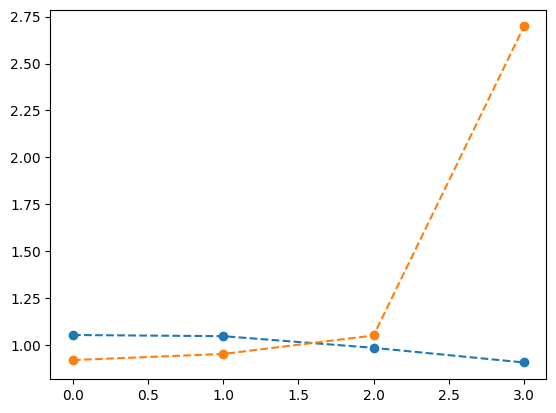

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
rmse_list = []
rmse_train_list = []
for degree in range(1, 5):
    polynomial_instance = PolynomialFeatures(degree=degree, include_bias=False)
    scaled_X_train_poly = polynomial_instance.fit_transform(scaled_X_train)
    scaled_X_test_poly = polynomial_instance.fit_transform(scaled_X_test)

 
    linear_model = LinearRegression()
    linear_model.fit(scaled_X_train_poly, y_train)
    y_pred = linear_model.predict(scaled_X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"rmse for degree {degree} is {rmse}")

    y_pred_train = linear_model.predict(scaled_X_train_poly)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)

    rmse_list.append(rmse)
    rmse_train_list.append(rmse_train)
#TODO Make new dataframe without dummyvariables
plt.plot(rmse_train_list, "--o")
plt.plot(rmse_list, "--o")

In [49]:
import statsmodels.formula.api as smf

results = smf.ols("tip ~ sex_Female", data=df_dummies).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.926
Date:                Fri, 24 Feb 2023   Prob (F-statistic):              0.166
Time:                        10:42:33   Log-Likelihood:                -423.98
No. Observations:                 244   AIC:                             852.0
Df Residuals:                     242   BIC:                             859.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0896      0.110     28.032      0.000       2.873       3.307
sex_Female    -0.2562      0.185     -1.388      0.166      -0.620       0.107
==============================================================================
Omnibus:                       75.995   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.975
Skew:                           1.415   Prob(JB):                     4.59e-43
Kurtosis:                       6.342   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
df_dummies = pd.get_dummies(df, drop_first=False)
results = smf.ols("tip ~ day_Thur + day_Fri + day_Sat + day_Sun", data=df_dummies).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.672
Date:                Fri, 24 Feb 2023   Prob (F-statistic):              0.174
Time:                        10:42:33   Log-Likelihood:                -422.43
No. Observations:                 244   AIC:                             852.9
Df Residuals:                     240   BIC:                             866.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3509      0.084     27.911      0.000       2.185       2.517
day_Thur       0.4206      0.160      2.635      0.009       0.106       0.735
day_Fri        0.3839      0.259      1.482      0.140      -0.126       0.894
day_Sat        0.6422      0.142      4.520      0.000       0.362       0.922
day_Sun        0.9042      0.149      6.085      0.000       0.612       1.197
==============================================================================
Omnibus:                       82.801   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.276
Skew:                           1.492   Prob(JB):                     1.82e-52
Kurtosis:                       6.811   Cond. No.                     3.57e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.49e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""